In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('output/artist_data.csv')

In [3]:
df.head()

,Unnamed: 0,Artist,Year Inducted,Years Waited,# of Years Nominated,Influenced,Certified Units (Millions),Albums in RS500,Top 100 Singles,Highest Position,Times on Cover of RS,Score,Spotify,In_Out
0,0,The Beatles,1988.0,0,1,1230.0,178.0,10.0,80,1,16.0,4.81,15022354,1
1,1,Elvis Presley,1986.0,0,1,273.0,146.5,3.0,158,1,7.0,3.31,7518562,1
2,2,The Eagles,1998.0,0,1,17.0,120.0,2.0,21,1,3.0,3.50,8989332,1
3,3,Led Zeppelin,1995.0,0,1,355.0,111.5,5.0,10,4,12.0,4.50,10306295,1
4,4,Michael Jackson,2001.0,3,1,176.0,84.0,3.0,49,1,6.0,3.65,24068900,1


In [4]:
df.drop(['Unnamed: 0','Artist','Year Inducted'],axis=1,inplace=True)

In [5]:
df.head()

,Years Waited,# of Years Nominated,Influenced,Certified Units (Millions),Albums in RS500,Top 100 Singles,Highest Position,Times on Cover of RS,Score,Spotify,In_Out
0,0,1,1230.0,178.0,10.0,80,1,16.0,4.81,15022354,1
1,0,1,273.0,146.5,3.0,158,1,7.0,3.31,7518562,1
2,0,1,17.0,120.0,2.0,21,1,3.0,3.50,8989332,1
3,0,1,355.0,111.5,5.0,10,4,12.0,4.50,10306295,1
4,3,1,176.0,84.0,3.0,49,1,6.0,3.65,24068900,1


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_data = scaler.transform(df)

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)

In [11]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
x_pca = pca.transform(scaled_data)

In [13]:
scaled_data.shape

(359, 11)

In [14]:
x_pca.shape

(359, 2)

Text(0,0.5,'Second Principal Component')

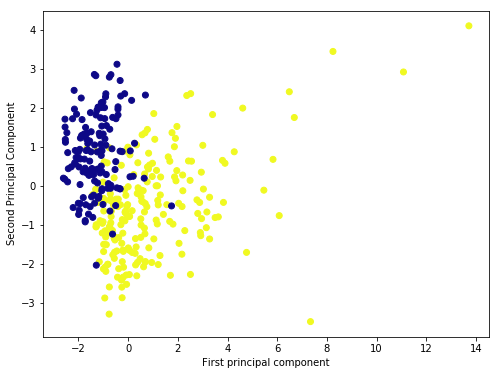

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['In_Out'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [16]:
pca.components_

array([[-0.31481328,  0.01802279,  0.33778772,  0.38518482,  0.41832074,
         0.26219948, -0.10430677,  0.38530022,  0.1452862 ,  0.37554696,
         0.26996168],
       [ 0.14340804, -0.38024175,  0.30125917, -0.0284078 ,  0.2527136 ,
        -0.43336275,  0.25331835,  0.11372235,  0.51257047, -0.04908171,
        -0.38649496]])

In [17]:
df_comp = pd.DataFrame(pca.components_)

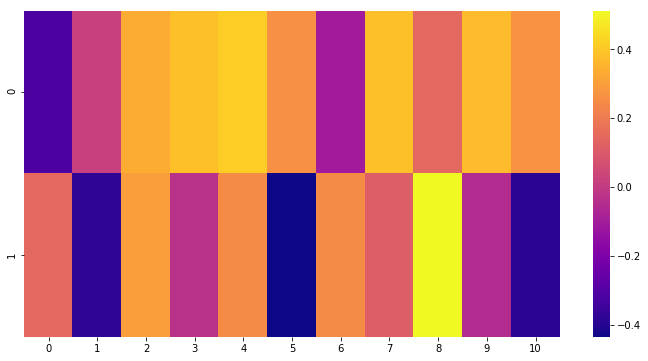

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)